In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, matplotlib.pyplot as pyviz, nltk, os, wordcloud
pd.set_option("display.max_columns", None)
lmtz = nltk.stem.WordNetLemmatizer()
from plotly import express
dnld=['punkt','wordnet','stopwords','omw-1.4']
for d in dnld:
    nltk.download(d)

swnltk = set(nltk.corpus.stopwords.words('english'))
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import transformers
transformers.logging.set_verbosity_error()
import re
import torch
from sklearn import model_selection
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Data Reading

In [ ]:
def WineDataReading():   # fuicntion to read the dataset
    listoffiles=os.listdir(os.getcwd())
    data_to_use=[]
    for f in listoffiles:
        if "wine" in f or "data" in f or ".csv" in f:   # check for dataset
            data_to_use.append(f)    # store the daaset name
    wndt=pd.read_csv(data_to_use[0])   # read the data
    print("Available Records: {}\nAvailable Features: {}".format(wndt.shape[0],wndt.shape[1]))  # showing available records
    wnecat=wndt.dtypes[wndt.dtypes=='object'].index.tolist()   # checking categorical features
    wnenum=wndt.dtypes[wndt.dtypes!='object'].index.tolist()   # checking numerical features
    print("-----------------------------------------")
    print("Available Categorical Features: {}\nAvailable Numerical Features: {}".format(len(wnecat),len(wnenum)))
    return wndt
DataWn=WineDataReading()
DataWn.head()

Available Records: 129971
Available Features: 14
-----------------------------------------
Available Categorical Features: 11
Available Numerical Features: 3


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Data Information

In [ ]:
def DataDet(rvwne):    # fucntion to check feature information
    print("Details of Data Features\n")
    print(rvwne.info())   # print feature information
    print("Missing Values Available in Data\n")
    print(rvwne.isnull().sum())   # check for missing values
    msvalues=sum(rvwne.isnull().sum())
    print("\nTotal Available Missing Values(Initially): {}".format(msvalues))
    if msvalues>0:   # is number of misisng values > 0
        wnecat=rvwne.dtypes[rvwne.dtypes=='object'].index.tolist()  # storing categorical features
        wnenum=rvwne.dtypes[rvwne.dtypes!='object'].index.tolist()  # storing numerical features
        for ac in wnecat:
            rvwne[ac]=rvwne[ac].fillna(rvwne[ac].mode()[0])   # replace categorical misisng value by mode
        for am in wnenum:
            rvwne[am]=rvwne[am].fillna(rvwne[am].mean())   # replace numerical misisng value by mean
    msvalues1=sum(rvwne.isnull().sum())
    print("\nTotal Available Missing Values(After Cleaning): {}".format(msvalues1))
    print("Missing Values Status after Cleaning\n")
    print(rvwne.isnull().sum())
    return rvwne    # return the cleaned data
Clnd_DataWn=DataDet(DataWn)
Clnd_DataWn.head()

Details of Data Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Central Coast,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,Napa Valley,Central Coast,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Central Coast,Alexander Peartree,@vossroger,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Text Cleaning

In [ ]:
def NLPApplication(WneDt):    # fucntion to lemmatize texts
    def LemmaWne(wtx):
        return  [lmtz.lemmatize(t) for t in wtx]
    def RevCleaning(rvwne):     # function to clean text
        StpEng = list(nltk.corpus.stopwords.words('english'))    # taking stopwords in a list
        pncwne=""
        delwords=["http","HTTP","com","COM","rt","RT","https","HTTPS"]    # taking text tags presemnt in the review comments
        for rw in rvwne:    # loop to check each character to detect punctuation, special character and numerical values
            if rw.isalpha()==True:
                pncwne+=rw
            if rw.isalnum()==False:
                pass
            if rw==" " or rw=="." or rw=="," or rw==";":
                pncwne+=" "
        tkwne1=str(pncwne.lower()).split()    # tokenize texts
        delrem=[]
        for i in tkwne1:
            if i not in delwords:
                delrem.append(i)    # remove text tags
        clstp=[]
        for i in delrem:
            if i not in StpEng:    # remove storwords
                clstp.append(i)
        clstp_joined=' '.join(clstp)
        tkwne2=clstp_joined.split()
        lmwne=LemmaWne(tkwne2)    # tokenizse texts
        return ' '.join(lmwne)
    CLN=[]
    RevTx=WneDt["description"].tolist()
    for i in RevTx:
        CLN.append(RevCleaning(i))     # call cleaning fucntion
    WneDt['TextCleaned']=CLN
    return WneDt     # return cleaned data
ClnWn=NLPApplication(Clnd_DataWn)    # call main fucntion
ClnWn.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,TextCleaned
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Central Coast,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,Napa Valley,Central Coast,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity wine smooth still structured firm ...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Central Coast,Alexander Peartree,@vossroger,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottling come across rather ...


<Axes: title={'center': 'Top Countries with Wine Review'}>

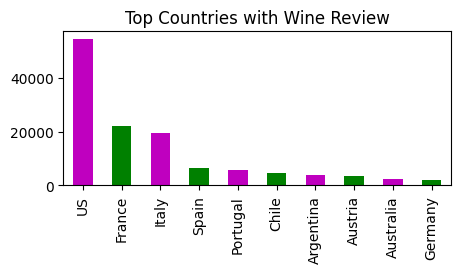

In [ ]:
ClnWn['country'].value_counts()[:10].plot(kind='bar',title="Top Countries with Wine Review",figsize=(5,2),color=["m","g"])

<Axes: title={'center': 'Top Wine Variety'}>

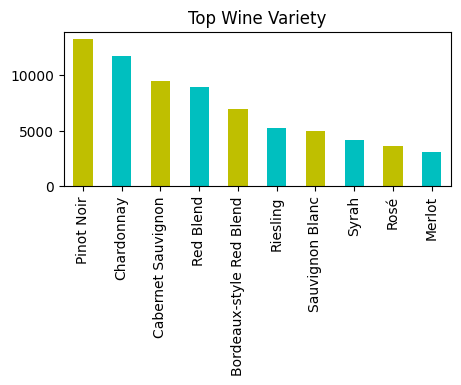

In [ ]:
ClnWn['variety'].value_counts()[:10].plot(kind='bar',title="Top Wine Variety",figsize=(5,2),color=["y","c"])

<Axes: title={'center': 'Top Wine Testers'}>

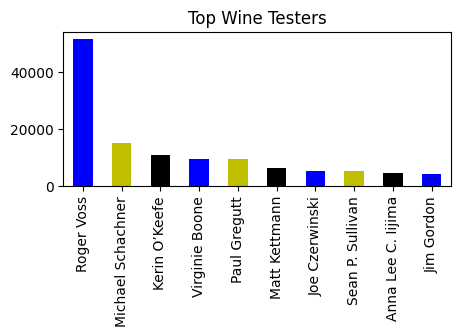

In [ ]:
ClnWn['taster_name'].value_counts()[:10].plot(kind='bar',title="Top Wine Testers",figsize=(5,2),color=["b","y","k"])

## Sentiment Extraction

In [ ]:
wntext=ClnWn['TextCleaned'].tolist()    # taking cleaned texts into a list
polwne=[]    # take an empty list to store the polarity
sntwne=[]    # take an empty list to store the sectiments
for i in wntext:
    wnrvpl=TextBlob(str(i)).sentiment    # extract polarity
    polwne.append(wnrvpl[0])      # store the polarity
for i in range(len(polwne)):    # loop to apply condiction for preparing sentiments
    if polwne[i]>0:
        sntwne.append("Positive")
    elif polwne[i]<0:
        sntwne.append("Negative")
    else:
        sntwne.append("Neutral")
ClnWn['WineSentiment']=sntwne    # assign sentiments into a new feature whcih will be taken as the target feature
ClnWn=ClnWn.sample(frac=1)
ClnWn=ClnWn.reset_index(drop=True)
ClnWn.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,TextCleaned,WineSentiment
0,32900,US,Black as night in the glass and noticeably vis...,Blessings,91,45.0,California,Santa Clara Valley,Central Coast,Matt Kettmann,@mattkettmann,Aver Family Vineyards 2011 Blessings Petite Si...,Petite Sirah,Aver Family Vineyards,black night glass noticeably viscous show broo...,Negative
1,95215,France,"This cherry-fruited wine is spicy, but a stron...",Les Violettes,84,10.0,Beaujolais,Beaujolais-Villages,Central Coast,Roger Voss,@vossroger,Boutinot 2016 Les Violettes (Beaujolais-Villa...,Gamay,Boutinot,cherryfruited wine spicy strong acid streak gi...,Positive
2,115307,US,This wine's Honeycrisp apple and Applejacks ce...,Dutton Ranch,94,44.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Patz & Hall 2015 Dutton Ranch Chardonnay (Russ...,Chardonnay,Patz & Hall,wine honeycrisp apple applejack cereal scent l...,Positive
3,65242,US,"Faint aromatically with dialed-high acidity, t...",Reserve,87,17.0,California,Mendocino,Central Coast,Virginie Boone,@vboone,Highway 253 2012 Gewürztraminer (Mendocino),Gewürztraminer,Highway 253,faint aromatically dialedhigh acidity gewürztr...,Negative
4,88124,US,"Mandarin-orange zest, cut Asian pear, lemon bl...",Zabala Vineyard,90,22.0,California,Monterey County,Central Coast,Matt Kettmann,@mattkettmann,MaidenStoen 2014 Zabala Vineyard Riesling (Mon...,Riesling,MaidenStoen,mandarinorange zest cut asian pear lemon bloss...,Positive


<Axes: title={'center': 'Wine Review Sentiment Count'}>

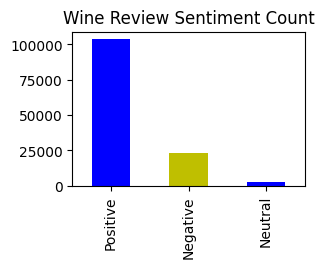

In [ ]:
ClnWn['WineSentiment'].value_counts().plot(kind='bar',title="Wine Review Sentiment Count",figsize=(3,2),color=["b","y"])

## RoBERTa Model Preparation

### Model Design

In [ ]:
TrWne, TsWne = model_selection.train_test_split(ClnWn, test_size=0.25, random_state=35)  # split data (75%-25% ratio)
MdlRbrt = transformers.BertTokenizer.from_pretrained('bert-base-uncased')    # get the BERT layers from BertTokenizer
EncTrWne=MdlRbrt(list(TrWne['TextCleaned']),truncation=True,padding=True)   # creating the training predictor data
EncTsWne=MdlRbrt(list(TsWne['TextCleaned']),truncation=True,padding=True)   # creating the test predictor data
SentimentEnc = {ClnWn['WineSentiment'].unique()[0]: 0, ClnWn['WineSentiment'].unique()[1]: 1, ClnWn['WineSentiment'].unique()[2]: 2}
TraininSents = TrWne['WineSentiment'].map(SentimentEnc).values.astype('int64')    # convert training target to numerical
TestSents = TsWne['WineSentiment'].map(SentimentEnc).values.astype('int64')    # convert test target to numerical

### Model Compilation

In [ ]:
# create TrainingSlices and TestSlices whcih are the tensors compatible to PyTorch
TrainingSlices = tf.data.Dataset.from_tensor_slices((dict(EncTrWne), TraininSents)).shuffle(len(TraininSents)).batch(32)
TestSlices = tf.data.Dataset.from_tensor_slices((dict(EncTsWne), TestSents)).batch(32)

# Finalize RoBERTa model
WneRb = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(SentimentEnc.keys()))

# Compile Model
WneRb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
WneRb.summary() # RoBERTa model summary

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [ ]:
History = WneRb.fit(TrainingSlices, epochs=5, validation_data=TestSlices)   # training RoBERTa model

Epoch 1/5
3047/3047 [==============================] - 396s 113ms/step - loss: 0.2219 - accuracy: 0.9179 - val_loss: 0.1214 - val_accuracy: 0.9553
Epoch 2/5
3047/3047 [==============================] - 306s 100ms/step - loss: 0.0987 - accuracy: 0.9648 - val_loss: 0.0950 - val_accuracy: 0.9662
Epoch 3/5
3047/3047 [==============================] - 306s 100ms/step - loss: 0.0625 - accuracy: 0.9783 - val_loss: 0.0724 - val_accuracy: 0.9735
Epoch 4/5
3047/3047 [==============================] - 304s 100ms/step - loss: 0.0451 - accuracy: 0.9841 - val_loss: 0.0604 - val_accuracy: 0.9803
Epoch 5/5
3047/3047 [==============================] - 308s 101ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0602 - val_accuracy: 0.9803


### Model Testing

In [ ]:
RbLs, RbAcr=[],[]
lsts,acts=WneRb.evaluate(TestSlices)    # evaluate RoBERTa model using test data
print("RoBERT Test Result for Wine Review Sentiments")
print("Accuracy: {}\nLoss: {}".format(round(acts,3)*100,lsts))
print("===========================================\n")
RbLs.append(lsts)
RbAcr.append(round(acts,3)*100)

lstr,actr=WneRb.evaluate(TrainingSlices)    # evaluate RoBERTa model using train data

print("\nRoBERT Train Result for Wine Review Sentiments")
print("Accuracy: {}\nLoss: {}".format(round(actr,3)*100,lstr))
RbLs.append(lstr)
RbAcr.append(round(actr,3)*100)

1016/1016 [==============================] - 36s 35ms/step - loss: 0.0602 - accuracy: 0.9803
RoBERT Test Result for Wine Review Sentiments
Accuracy: 98.0
Loss: 0.06022036075592041

3047/3047 [==============================] - 120s 38ms/step - loss: 0.0179 - accuracy: 0.9941

RoBERT Train Result for Wine Review Sentiments
Accuracy: 99.4
Loss: 0.017871133983135223


In [ ]:
History.history

{'loss': [0.2218601107597351,
  0.09871327877044678,
  0.06247580423951149,
  0.04508074000477791,
  0.03470586985349655],
 'accuracy': [0.9178891777992249,
  0.9647510051727295,
  0.9782515168190002,
  0.9841092228889465,
  0.9882332682609558],
 'val_loss': [0.12139269709587097,
  0.09502480924129486,
  0.07243501394987106,
  0.06039964780211449,
  0.06022036075592041],
 'val_accuracy': [0.9552826881408691,
  0.9661773443222046,
  0.973501980304718,
  0.980272650718689,
  0.9803034663200378]}

In [ ]:
DFHist=pd.DataFrame({
    "Iteration":[i+1 for i in range(5)],
    "Training_Accuracy":History.history['accuracy'],
    "Validation_Accuracy":History.history['val_accuracy'],
    "Training_Loss":History.history['loss'],
    "Validation_Loss":History.history['val_loss']
})
DFHist=DFHist.set_index("Iteration")
DFHist

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
Iteration,,,,
1,0.917889,0.955283,0.221860,0.121393
2,0.964751,0.966177,0.098713,0.095025
3,0.978252,0.973502,0.062476,0.072435
4,0.984109,0.980273,0.045081,0.060400
5,0.988233,0.980303,0.034706,0.060220


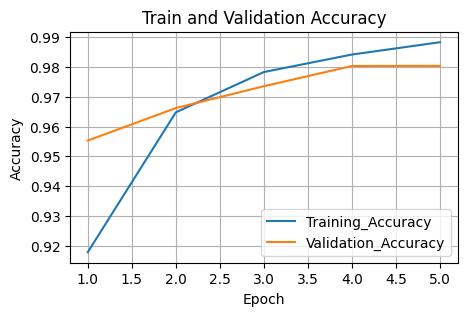

In [ ]:
DFHist[["Training_Accuracy","Validation_Accuracy"]].plot(kind='line',title="Train and Validation Accuracy", figsize=(5,3),xlabel="Epoch",ylabel="Accuracy")
pyviz.grid()
pyviz.show()

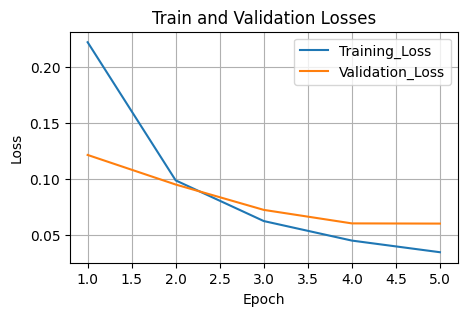

In [ ]:
DFHist[["Training_Loss","Validation_Loss"]].plot(kind='line',title="Train and Validation Losses", figsize=(5,3),xlabel="Epoch",ylabel="Loss")
pyviz.grid()
pyviz.show()